In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

from nnAudio import Spectrogram

import sys
sys.path.insert(0,'../')

import os
os.environ['CUDA_VISIBLE_DEVICES']='0,1'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
from keras.models import Sequential
import kapre.time_frequency as time_frequency

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.3
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [3]:
y_list = np.load('./y_list.npy')

In [4]:
t_start = time.time()
model = Sequential()
model.add(time_frequency.Spectrogram(n_dft=2048, n_hop=512, padding='same', input_shape=(1, 80000),
                                 power_spectrogram=2.0, return_decibel_spectrogram=False,
                                 trainable_kernel=False, image_data_format='default'))
model.summary()
time_used = time.time()-t_start
print(time_used)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spectrogram_1 (Spectrogram)  (None, 1025, 157, 1)      4198400   
Total params: 4,198,400
Trainable params: 0
Non-trainable params: 4,198,400
_________________________________________________________________
0.32314610481262207


In [5]:
timing = []

for e in range(20):
    t_start = time.time()
    spec = model.predict(y_list.reshape(1770,1,80000))
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

6.396745443344116
1.6355700492858887
1.6403234004974365
1.642141342163086
1.6381886005401611
1.6448132991790771
1.6455988883972168
1.6499323844909668
1.64725661277771
1.6526598930358887
1.6506757736206055
1.643798828125
1.6406018733978271
1.6500022411346436
1.64971923828125
1.6469249725341797
1.6477322578430176
1.647057294845581
1.646327018737793
1.6490507125854492


In [6]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  1.8832560062408448
std =  1.0354746251072184


In [7]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'kapre_GPU'

In [8]:
data.to_csv('Spec_kapre_GPU')

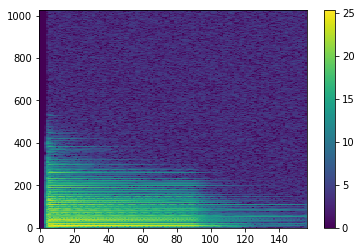

In [32]:
plt.imshow(np.log(spec[0][:,:,0]+1), aspect='auto', origin='lower')
plt.colorbar()

In [25]:
mel_layer = Spectrogram.STFT(window='hann')

STFT kernels created, time used = 0.2659 seconds


In [26]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [27]:
spec_torch = mel_layer(y_torch)

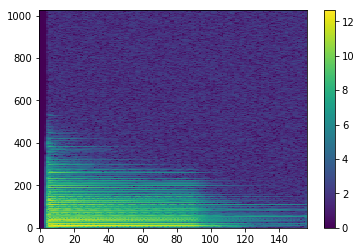

In [33]:
plt.imshow(torch.log(spec_torch[0]+1).cpu().numpy(), aspect='auto', origin='lower')
plt.colorbar()

In [29]:
np.log(spec[0][:,:,0]+1)

array([[0.       , 0.       , 0.       , ..., 3.831437 , 1.5301905,
        4.9539375],
       [0.       , 0.       , 0.       , ..., 3.7312279, 5.193228 ,
        5.518034 ],
       [0.       , 0.       , 0.       , ..., 4.0063353, 4.986146 ,
        5.643697 ],
       ...,
       [0.       , 0.       , 0.       , ..., 3.6795478, 3.7861505,
        4.187462 ],
       [0.       , 0.       , 0.       , ..., 5.062291 , 4.8066344,
        4.0490284],
       [0.       , 0.       , 0.       , ..., 5.040604 , 2.6743717,
        3.678147 ]], dtype=float32)

In [41]:
torch.log(spec_torch[0]+1)

tensor([[0.0000, 0.0000, 0.0000,  ..., 1.9242, 0.2813, 3.2398],
        [0.0000, 0.0000, 0.0000,  ..., 1.8767, 2.8505, 3.4601],
        [0.0000, 0.0000, 0.0000,  ..., 2.0659, 2.6300, 3.4629],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 2.0736, 1.8330, 1.9849],
        [0.0000, 0.0000, 0.0000,  ..., 2.6095, 2.5553, 2.5723],
        [0.0000, 0.0000, 0.0000,  ..., 2.5433, 1.7948, 2.4609]])

In [35]:
import librosa

In [42]:
np.log(abs(librosa.stft(y_list[0]))+1)

array([[0.        , 0.        , 0.        , ..., 1.9241908 , 0.28129715,
        3.2397602 ],
       [0.        , 0.        , 0.        , ..., 1.8767037 , 2.8504963 ,
        3.460142  ],
       [0.        , 0.        , 0.        , ..., 2.0659425 , 2.6300266 ,
        3.462904  ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.0736456 , 1.8329872 ,
        1.9849361 ],
       [0.        , 0.        , 0.        , ..., 2.609465  , 2.5552638 ,
        2.5722692 ],
       [0.        , 0.        , 0.        , ..., 2.5433197 , 1.7948505 ,
        2.4608877 ]], dtype=float32)

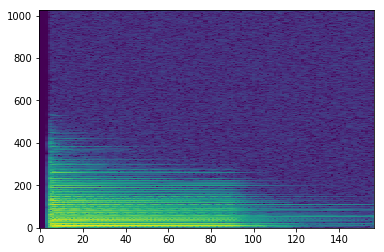

In [39]:
plt.imshow(np.log(abs(librosa.stft(y_list[0]))+1), aspect='auto', origin='lower')